<a href="https://colab.research.google.com/github/deena19liebert/Data-Exploration-And-Visualization/blob/main/R_using_PyCharm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 First 5 rows:
   ID  Age  Income  Gender    Education
0   1   56   51962    Male  High School
1   2   46   77191  Female     Bachelor
2   3   32   74131    Male       Master
3   4   60   46023  Female          PhD
4   5   25   71090    Male     Bachelor

📊 Summary statistics:
              ID        Age        Income Gender Education
count   10.00000  10.000000     10.000000     10        10
unique       NaN        NaN           NaN      2         4
top          NaN        NaN           NaN   Male  Bachelor
freq         NaN        NaN           NaN      6         3
mean     5.50000  41.700000  59112.000000    NaN       NaN
std      3.02765  12.347289  23218.399734    NaN       NaN
min      1.00000  25.000000  30769.000000    NaN       NaN
25%      3.25000  33.000000  35830.500000    NaN       NaN
50%      5.50000  39.000000  61526.000000    NaN       NaN
75%      7.75000  53.500000  76426.000000    NaN       NaN
max     10.00000  60.000000  89735.000000    NaN       NaN

❓ Missing va

/tmp/ipython-input-1-3245551660.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


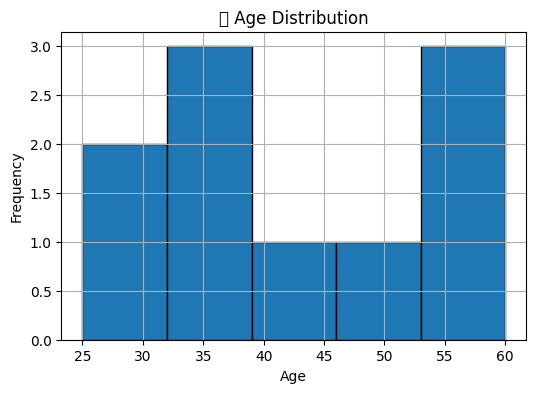

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


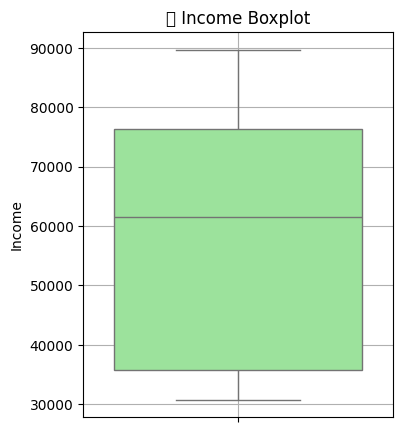

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


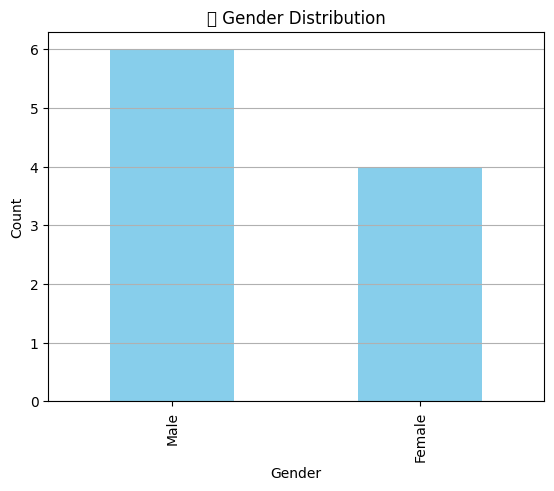

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


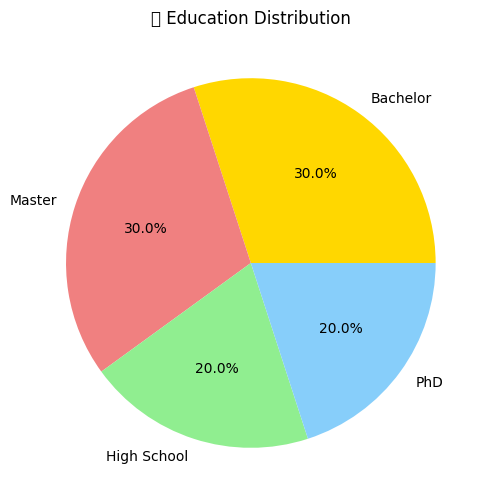

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00,  9.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport

np.random.seed(42)

data = {
    'ID': range(1, 11),
    'Age': np.random.randint(18, 65, size=10),
    'Income': np.random.randint(30000, 90000, size=10),
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male'],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'Bachelor',
                  'PhD', 'High School', 'Master']
}
df = pd.DataFrame(data)

print("📝 First 5 rows:")
print(df.head())

print("\n📊 Summary statistics:")
print(df.describe(include='all'))

print("\n❓ Missing values:")
print(df.isnull().sum())

print("\n👥 Unique Genders:", df['Gender'].unique())
print("🎓 Unique Education Levels:", df['Education'].unique())

selected_columns = df[['Age', 'Income']]
print("\n📌 Selected columns (Age & Income):")
print(selected_columns.head())

filtered_data = df[df['Age'] > 30]
print("\n🔍 Filtered rows (Age > 30):")
print(filtered_data)

filtered_rows = df[(df['Gender'] == 'Male') & (df['Education'] == 'Master')]
print("\n🔍 Male with Master’s Degree:")
print(filtered_rows)

# Visualizations

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=5, edgecolor='black')
plt.title('📈 Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot (Income)
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['Income'], color='lightgreen')
plt.title('💰 Income Boxplot')
plt.ylabel('Income')
plt.grid(True)
plt.show()

# Bar plot (Gender)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color='skyblue')
plt.title('👤 Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Pie Chart (Education)
education_counts = df['Education'].value_counts()
plt.figure(figsize=(6, 6))
education_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('🎓 Education Distribution')
plt.ylabel('')
plt.show()

# Plotly (Income vs Age)
fig = px.scatter(df, x='Age', y='Income', color='Education', symbol='Gender',
                 title="💡 Interactive: Income vs Age by Education and Gender")
fig.show()

# Automated report
profile = ProfileReport(df, title="📋 Data Profile Report", explorative=True)
profile.to_notebook_iframe()